<a href="https://colab.research.google.com/github/DOLLY41/Dolly/blob/main/movie_rating_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CODSOFT INTERNSHIP**

**TASK - 2 : MOVIE RATING PREDICTION**

**Author : DOLLY SHARMA**

**Domain : DATA SCIENCE**

**Batch :   NOVEMBER BATCH A88**

In [ ]:
#Import Libraries for data processing and modelling

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
from google.colab import files
uploaded = files.upload()

In [54]:
# Linking dataset into colab
import io
data = pd.read_csv((io.BytesIO(uploaded['IMDB_Movies_data_India.csv'])),encoding='unicode_escape')


In [55]:
# Dataset First Look
data.head(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
7,.in for Motion,(2008),59 min,Documentary,NaN,NaN,Anirban Datta,NaN,NaN,NaN
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,(2014),116 min,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon


In [50]:
imdb_df.tail(10)

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Genre_mean_rating,Director_encoded,Actor1_encoded,Actor2_encoded,Actor3_encoded
15494,2001,153,Biography,6.2,1496,Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee,6.737391,7.187500,4.168421,5.793750,5.973333
15494,2001,153,Drama,6.2,1496,Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee,6.056744,7.187500,4.168421,5.793750,5.973333
15494,2001,153,History,6.2,1496,Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee,6.905051,7.187500,4.168421,5.793750,5.973333
15503,1989,125,Action,5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth,5.520463,6.290476,6.377419,5.800000,6.018750
15503,1989,125,Crime,5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth,5.820114,6.290476,6.377419,5.800000,6.018750
15503,1989,125,Drama,5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth,6.056744,6.290476,6.377419,5.800000,6.018750
15505,1999,129,Action,4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani,5.520463,5.175000,5.440845,4.603704,5.754545
15505,1999,129,Drama,4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani,6.056744,5.175000,5.440845,4.603704,5.754545
15508,1998,130,Action,6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja,5.520463,4.090625,6.045128,5.632558,5.780000
15508,1998,130,Drama,6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja,6.056744,4.090625,6.045128,5.632558,5.780000


In [56]:
data.shape

(15509, 10)

In [57]:
print("Number of Rows:",data.shape[0])
print("Number of Columns:",data.shape[1])

Number of Rows: 15509
Number of Columns: 10


# **DATA CLEANING**

In [58]:
#Checking Missing values in dataset
print("Any missing value?",data.isnull().values.any())

Any missing value? True


In [61]:
data.isnull().sum()


,0
Name,0
Year,528
Duration,8269
Genre,1877
Rating,7590
Votes,7589
Director,525
Actor 1,1617
Actor 2,2384
Actor 3,3144


<Axes: >

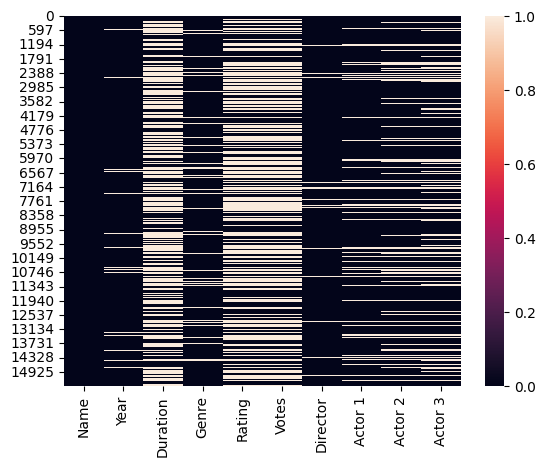

In [62]:
sns.heatmap(data.isnull())

In [65]:
per_missing = data.isnull().sum()*100/len(data)
per_missing

,0
Name,0.000000
Year,3.404475
Duration,53.317429
Genre,12.102650
Rating,48.939326
Votes,48.932878
Director,3.385131
Actor 1,10.426204
Actor 2,15.371720
Actor 3,20.272100


In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [68]:
data.duplicated().sum()

6

In [ ]:
#drop all the missing value

In [69]:
data.dropna(inplace=True)

In [70]:
data.isnull().sum()


,0
Name,0
Year,0
Duration,0
Genre,0
Rating,0
Votes,0
Director,0
Actor 1,0
Actor 2,0
Actor 3,0


In [72]:
#check for dupplicate data
dup_data=data.duplicated().any()
print("Are there any duplicate values?",dup_data)

Are there any duplicate values? False


In [93]:
data.drop_duplicates(inplace=True)

In [92]:
data.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [89]:
data.groupby('Genre')['Rating'].mean().sort_values(ascending=False)

,Rating
Genre,
"History, Romance",9.4
"Documentary, Family, History",9.3
"Documentary, Music",8.9
"Documentary, Thriller",8.7
"Documentary, Sport",8.6
...,...
"Action, Crime, Sci-Fi",2.7
"Comedy, Horror, Musical",2.7
"Family, Music, Romance",2.6


In [88]:
data.groupby('Year')['Rating'].mean().sort_values(ascending=False)

,Rating
Year,
(1952),7.212500
(1957),7.080645
(1944),7.075000
(1940),7.050000
(1953),6.955000
...,...
(1995),5.310937
(2002),5.281111
(2003),5.258772


In [85]:
data.groupby('Director')['Rating'].mean().sort_values(ascending=False)

,Rating
Director,
Saif Ali Sayeed,10.0
Sriram Raja,9.7
Munni Pankaj,9.4
Suhrud Godbole,9.4
Arvind Pratap,9.4
...,...
Navin Batra,1.9
Raajeev Walia,1.8
Stanley D'Costa,1.8


In [84]:
data.describe(include="all")

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
count,5659,5659,5659,5659,5659.000000,5659,5659,5659,5659,5659
unique,5385,91,174,376,NaN,2027,2431,1960,2321,2556
top,Baazi,(2019),120 min,Drama,NaN,7,David Dhawan,Amitabh Bachchan,Rekha,Pran
freq,4,227,169,844,NaN,90,41,104,52,57
mean,NaN,NaN,NaN,NaN,5.898533,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,1.381165,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,1.100000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,6.100000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,6.900000,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='Year', ylabel='Rating'>

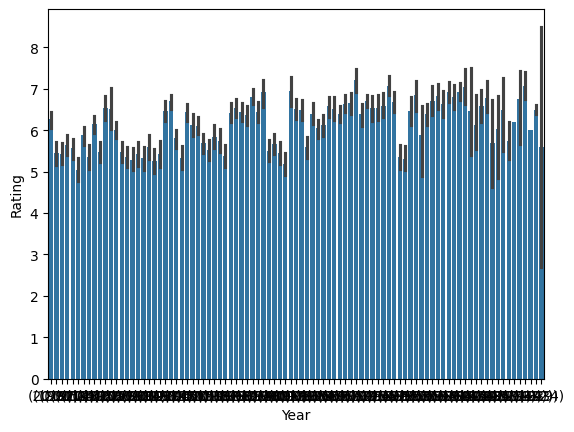

In [94]:
sns.barplot(x='Year',y='Rating',data=data)


# Data Pre-Processing
*   Data have to be processed to make more easier to derive insights from it and pre-processed will be more suitable while fitting the data into an algorithm.
*   In this project we have processed the data by column wise based on the
requirement.
  List item





In [31]:
# Replacing the brackets from year column
imdb_df['Year'] = imdb_df['Year'].astype(str).str.replace(r'[()]', '', regex=True).astype(int)

In [32]:
# Remove the min word from 'Duration' column and convert all values to numeric
imdb_df['Duration'] = pd.to_numeric(imdb_df['Duration'].str.replace(' min', ''))

In [ ]:
# Splitting the genre by, to keep only unique genres and replacing the null values with mode
imdb_df['Genre'] = imdb_df['Genre'].str.split(', ')
imdb_df = imdb_df.explode('Genre')
imdb_df['Genre'].fillna(imdb_df['Genre'].mode()[0], inplace=True)

In [34]:
# Convert 'Votes' to numeric and replace the , to keep only numerical part
imdb_df['Votes'] = pd.to_numeric(imdb_df['Votes'].str.replace(',', ''))

In [35]:
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11979 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      11979 non-null  object 
 1   Year      11979 non-null  int64  
 2   Duration  11979 non-null  int64  
 3   Genre     11979 non-null  object 
 4   Rating    11979 non-null  float64
 5   Votes     11979 non-null  int64  
 6   Director  11979 non-null  object 
 7   Actor 1   11979 non-null  object 
 8   Actor 2   11979 non-null  object 
 9   Actor 3   11979 non-null  object 
dtypes: float64(1), int64(3), object(6)
memory usage: 1.0+ MB


**Data Visualizing**




*   Visualization part is done to show the realtionships between the features present in the dataset.
*   In this project, we have used multiple charts to see the realtions within components of data which involves in the result.




In [36]:
#Here we have created a histogram over the years in the data

year = px.histogram(imdb_df, x = 'Year', histnorm='probability density', nbins = 30)
year.show()

In [37]:
# Group data by Year and calculate the average rating
avg_rating_by_year = imdb_df.groupby(['Year', 'Genre'])['Rating'].mean().reset_index()

# Get the top 10 genres
top_genres = imdb_df['Genre'].value_counts().head(10).index

# Filter the data to include only the top 3 genres
average_rating_by_year = avg_rating_by_year[avg_rating_by_year['Genre'].isin(top_genres)]

# Create the line plot with Plotly Express
fig = px.line(avg_rating_by_year, x='Year', y='Rating', color = "Genre")

# Updating the detals into chart like title and hue
fig.update_layout(title='Average Rating by Year for Top Genres', xaxis_title='Year', yaxis_title='Average Rating')

# Show the plot
fig.show()

In [38]:
#This histogram shows the distribution of ratings and its probable density

rating_fig = px.histogram(imdb_df, x = 'Rating', histnorm='probability density', nbins = 40)
rating_fig.update_layout(title='Distribution of Rating', title_x=0.5, title_pad=dict(t=20), title_font=dict(size=20), xaxis_title='Rating', yaxis_title='Probability Density', xaxis=dict(showgrid=False), yaxis=dict(showgrid=False), bargap=0.02, plot_bgcolor = 'white')
rating_fig.show()

# Feature Engineering

In [39]:
# Importing essential libraries for model building

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.linear_model import LinearRegression

from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score

In [40]:
# Dropping Name column because it doesn't impact the outcome
imdb_df.drop('Name', axis = 1, inplace = True)

In [41]:
# Grouping the columns with their average rating and then creating a new feature

genre_mean_rating = imdb_df.groupby('Genre')['Rating'].transform('mean')
imdb_df['Genre_mean_rating'] = genre_mean_rating

director_mean_rating = imdb_df.groupby('Director')['Rating'].transform('mean')
imdb_df['Director_encoded'] = director_mean_rating

actor1_mean_rating = imdb_df.groupby('Actor 1')['Rating'].transform('mean')
imdb_df['Actor1_encoded'] = actor1_mean_rating

actor2_mean_rating = imdb_df.groupby('Actor 2')['Rating'].transform('mean')
imdb_df['Actor2_encoded'] = actor2_mean_rating

actor3_mean_rating = imdb_df.groupby('Actor 3')['Rating'].transform('mean')
imdb_df['Actor3_encoded'] = actor3_mean_rating

In [42]:
# Keeping the predictor and target variable

X = imdb_df[[ 'Year', 'Votes', 'Duration', 'Genre_mean_rating','Director_encoded','Actor1_encoded', 'Actor2_encoded', 'Actor3_encoded']]
y = imdb_df['Rating']

In [43]:
# Splitting the dataset into training and testing parts

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# **Model Building**

In [44]:
# Building machine learning model and training them
Model = LinearRegression()
Model.fit(X_train,y_train)
Model_pred = Model.predict(X_test)

In [45]:
# Evaluating the performance of model with evaluation metrics

print('The performance evaluation of Logistic Regression is below: ', '\n')
print('Mean squared error: ',mean_squared_error(y_test, Model_pred))
print('Mean absolute error: ',mean_absolute_error(y_test, Model_pred))
print('R2 score: ',r2_score(y_test, Model_pred))

The performance evaluation of Logistic Regression is below:  

Mean squared error:  0.4465441653985704
Mean absolute error:  0.4921902540765641
R2 score:  0.7641133663863862


# **Model Testing**

In [46]:
X.head(5)

,Year,Votes,Duration,Genre_mean_rating,Director_encoded,Actor1_encoded,Actor2_encoded,Actor3_encoded
1,2019,8,109,6.056744,7.000000,6.850000,7.00,7.00
3,2019,35,110,5.751042,4.400000,5.250000,4.40,4.46
3,2019,35,110,5.811087,4.400000,5.250000,4.40,4.46
5,1997,827,147,5.751042,5.335135,4.793617,5.73,5.93
5,1997,827,147,6.056744,5.335135,4.793617,5.73,5.93


In [47]:
y.head(5)

,Rating
1,7.0
3,4.4
3,4.4
5,4.7
5,4.7


In [48]:
# For testing, We create a new dataframe with values close to the any of our existing data to evaluate.

data = {'Year': [2019], 'Votes': [36], 'Duration': [111], 'Genre_mean_rating': [5.8], 'Director_encoded': [4.5], 'Actor1_encoded': [5.3], 'Actor2_encoded': [4.5], 'Actor3_encoded': [4.5]}
trail = pd.DataFrame(data)

In [49]:
# Predict the movie rating by entered data
rating_predicted = Model.predict(trail)

# Display the predicted result from the Model
print("Predicted Rating:", rating_predicted[0])

Predicted Rating: 4.207458962134328
